# PyTorch Practice File

## Imports

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

## Basics

In [2]:
# Tensors are similar to Numpy Arrays

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [3]:
# Making Tensors with zero values

x = torch.zeros([2,5])

print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
# Shape of Tensor

x.shape

torch.Size([2, 5])

In [5]:
# Making Tensor with random values

y = torch.rand([2,5])

print(y)

tensor([[0.5539, 0.7281, 0.3785, 0.9369, 0.7152],
        [0.3922, 0.9604, 0.5962, 0.4972, 0.9192]])


In [7]:
# Reshaping Tensor

y = y.view([1,10])

print(y)

tensor([[0.5539, 0.7281, 0.3785, 0.9369, 0.7152, 0.3922, 0.9604, 0.5962, 0.4972,
         0.9192]])


In [9]:
# Importing dataset from Torchvision database

train = datasets.MNIST(
    "", # location for the data to be stored ("" means locally)
    train = True, # this tells it that it's training data, if false then it's the test data
    download = True, # this tells it to download the dataset from the internet (if you already have it downloaded then this can be false)
    transform = transforms.Compose([transforms.ToTensor()]) #this transforms the data into a tensor format
)

test = datasets.MNIST(
    "",
    train = False,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to MNIST/raw/train-images-idx3-ubyte.gz
9920512it [00:06, 1485204.16it/s]
Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw
0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to MNIST/raw/train-labels-idx1-ubyte.gz
32768it [00:02, 15555.42it/s]
  0%|          | 0/1648877 [00:00<?, ?it/s]Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw
1654784it [00:00, 4381131.35it/s]
8192it [00:00, 69700.72it/s]Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [10]:
# Creating sets of the data (meaning creating batches)

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [11]:
#Printing data in one of the batches

for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
# Accessing the first image in the first batch

x, y = data[0][0], data[1][0]

print(y)

tensor(7)


In [14]:
import matplotlib.pyplot as plt

print(data[0][0].shape)

torch.Size([1, 28, 28])


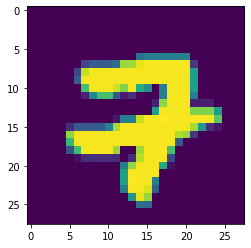

In [15]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [17]:
# Checking dataset balance

total = 0

counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [21]:
class Net(nn.Module):
    def __init__(self): # This initializes the network
        super().__init__() # This makes it so the the nn.Module methods are brought into our new class
        self.fc1 = nn.Linear(28*28, 64) # Creates an input layer (the input which is 28 pixels by 28 pixels for this case, the output which is the number of neurons in the layer)
        self.fc2 = nn.Linear(64, 64) # Creates a hidden layer (input needs to have the same amount of neurons as the previous layer, the output can be changed to whatever we want it to be)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # Notice in this last layer the output layer and the output is 10 since we have 10 classes corresponding to the numbers from 0 to 9 
    
    def forward(self, x): # This makes it so the data gets pushed forward through the network
        x = F.relu(self.fc1(x)) # This passes the output of the layer through the activation fuction (in this case it is relu)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # This one does not need an activation function since the purpose of the last layer is to classify rather than activate
        return F.log_softmax(x, dim=1) # This passes the result of the output layer through an optimizer (most people usually use log_softmax), additionally dim= 1 means the optimizer fuction is getting passed through the output batch rather than all the batches, or you can think it as an axis in the data)

net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
# Creating a random sample

X = torch.rand(28,28) # If we run this sample through the network as is, it would give us an error of size missmatch since we need to flatten the image

X = X.view(-1,28*28) # This flattens the sample data, the -1 means the size of the batch can be any

# print(X)

In [26]:
output = net(X) # Passes data through network
output

tensor([[-2.2509, -2.2888, -2.4145, -2.3186, -2.2952, -2.2844, -2.3067, -2.3047,
         -2.3395, -2.2336]], grad_fn=<LogSoftmaxBackward>)

In [28]:
import torch.optim as optim

# Personal note: a decaying learning rate makes it so the learning rate starts big, and the gradually becomes smaller in order to reach the true value

optimizer = optim.Adam( # Creates an optimizer, the fuction that tweaks weights in the network (on this case we are using Adam)
    net.parameters(), # Adjustable parameters for the optimizer
    lr= 0.001, # Learning rate (0.001 can also be written as 1e-3), this is the size of the steps taken by gradient decent.
    )

EPOCHS = 3 # How many times it goes through the whole data

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad() # This zeroes the gradient for loss calculation of each batch, usually used for cases where your GPU is not big enough to handle too much data.
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y) # This calculates the loss. There is different ways to calculate loss, the two major ones. for one-hot vector label input ( sample [0, 0, 1, 0] ), we could use mean square error. in our case, the label input is a scalar value (i.e. a single digit) thus we use nll_loss. 
        loss.backward() # This does backpropagation on your network based on your loss
        optimizer.step() # This adjusts the weights
    print(f"loss: {loss}")

loss: 0.0971565991640091
loss: 0.048936888575553894
loss: 0.050560981035232544


In [29]:
# EVALUATING THE MODEL

correct = 0
total = 0

with torch.no_grad(): # Makes it so the calculation does not use gradient, for the purposes of comparing results with testing data.
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]: # torch.argmax() returns the index of the highest value in the output vector. In this case, we used it due to the output being a vector while our label is a scalar value.
                correct += 1
            total +=1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.98


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[1].view(-1,28*28))[0]))